In [ ]:
%%capture
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

In [ ]:
%cd "/content/drive/Othercomputers/Mi portátil/projecte/StutterFormer"

In [ ]:
data = pd.read_csv("data/_complete.csv")
#data = pd.read_csv("data/rand100.csv")
data.head()

,speaker,speaker_gender,chapter,file,audio_length_stutter,audio_length_speech,audio_length_difference,transcription_length,transcription_similarity,stutter_count,interjection_count,repetition_sound_count,repetition_word_count,repetition_phrase_count,prolongation_count,file_path_stutter,file_path_speech
0,1743,M,142912,1743-142912-0020,11.140000,10.500000,0.640000,33,0.800000,2,0,0,0,0,2,LibriStutter/LibriStutter Audio/1743/142912/17...,LibriSpeech/1743/142912/1743-142912-0020.flac
1,1743,M,142912,1743-142912-0032,17.406259,14.775011,2.631247,47,0.972973,3,0,2,1,0,0,LibriStutter/LibriStutter Audio/1743/142912/17...,LibriSpeech/1743/142912/1743-142912-0032.flac
2,1743,M,142912,1743-142912-0010,15.127619,12.175011,2.952608,36,1.000000,2,0,0,1,1,0,LibriStutter/LibriStutter Audio/1743/142912/17...,LibriSpeech/1743/142912/1743-142912-0010.flac
3,1743,M,142912,1743-142912-0005,12.520272,11.440000,1.080272,32,0.896552,1,0,1,0,0,0,LibriStutter/LibriStutter Audio/1743/142912/17...,LibriSpeech/1743/142912/1743-142912-0005.flac
4,1743,M,142912,1743-142912-0007,11.950794,11.090023,0.860771,34,0.933333,2,0,0,1,0,1,LibriStutter/LibriStutter Audio/1743/142912/17...,LibriSpeech/1743/142912/1743-142912-0007.flac


In [ ]:
data.shape

(5670, 17)

In [ ]:
numerical = data.select_dtypes(include=[np.number])
numerical = numerical.drop(columns=['speaker', 'chapter'])
numerical.head()

,audio_length_stutter,audio_length_speech,audio_length_difference,transcription_length,transcription_similarity,stutter_count,interjection_count,repetition_sound_count,repetition_word_count,repetition_phrase_count,prolongation_count
0,11.140000,10.500000,0.640000,33,0.718750,2,0,0,0,0,2
1,17.406259,14.775011,2.631247,47,0.860465,3,0,2,1,0,0
2,15.127619,12.175011,2.952608,36,0.942857,2,0,0,1,1,0
3,12.520272,11.440000,1.080272,32,0.806452,1,0,1,0,0,0
4,11.950794,11.090023,0.860771,34,0.787879,2,0,0,1,0,1


In [ ]:
numerical.describe()

,audio_length_stutter,audio_length_speech,audio_length_difference,transcription_length,transcription_similarity,stutter_count,interjection_count,repetition_sound_count,repetition_word_count,repetition_phrase_count,prolongation_count
count,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.0,5670.000000,5670.000000,5670.000000,5670.000000
mean,14.419193,12.712500,1.706693,34.894180,0.637326,1.597707,0.0,0.396120,0.403704,0.395767,0.402116
std,4.362914,3.523672,1.736916,11.095049,0.308677,1.176996,0.0,0.617313,0.628444,0.626613,0.622273
min,1.940000,1.940000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,12.802676,11.585034,0.000000,29.000000,0.600000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,15.400113,13.990023,1.313107,37.000000,0.750000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,17.189637,15.155011,2.639229,43.000000,0.838710,3.000000,0.0,1.000000,1.000000,1.000000,1.000000
max,28.920363,18.240091,13.140363,68.000000,1.000000,4.000000,0.0,3.000000,3.000000,3.000000,3.000000


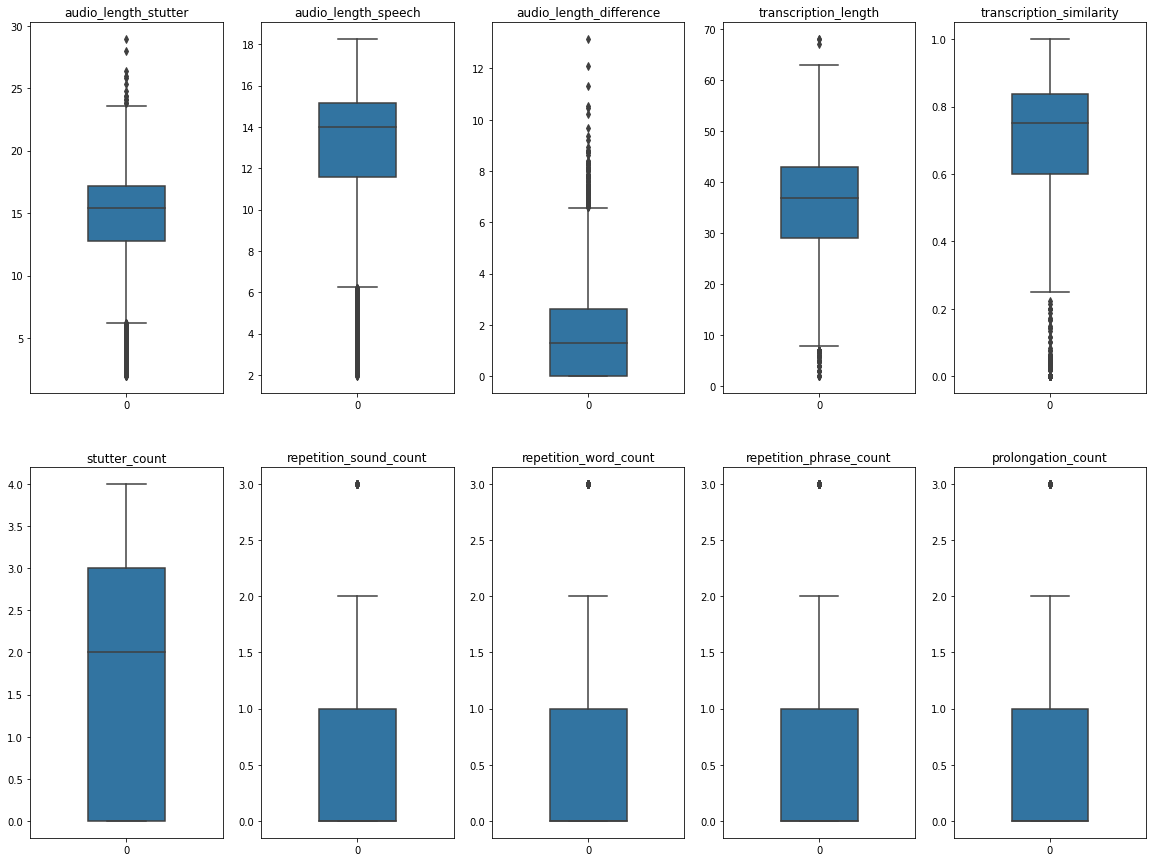

In [ ]:
numerical_columns = [
    'audio_length_stutter', 'audio_length_speech', 'audio_length_difference', 
    'transcription_length', 'transcription_similarity', 'stutter_count', 
    'repetition_sound_count', 'repetition_word_count', 'repetition_phrase_count', 'prolongation_count'
]

fig, axes = plt.subplots(2, 5, figsize=(20, 15))

for pos, plot in enumerate(numerical_columns):
    i = pos // 5
    j = pos % 5
    sns.boxplot(ax=axes[i, j], data=data[plot], orient="v", width=0.4)
    axes[i, j].set_title(plot)

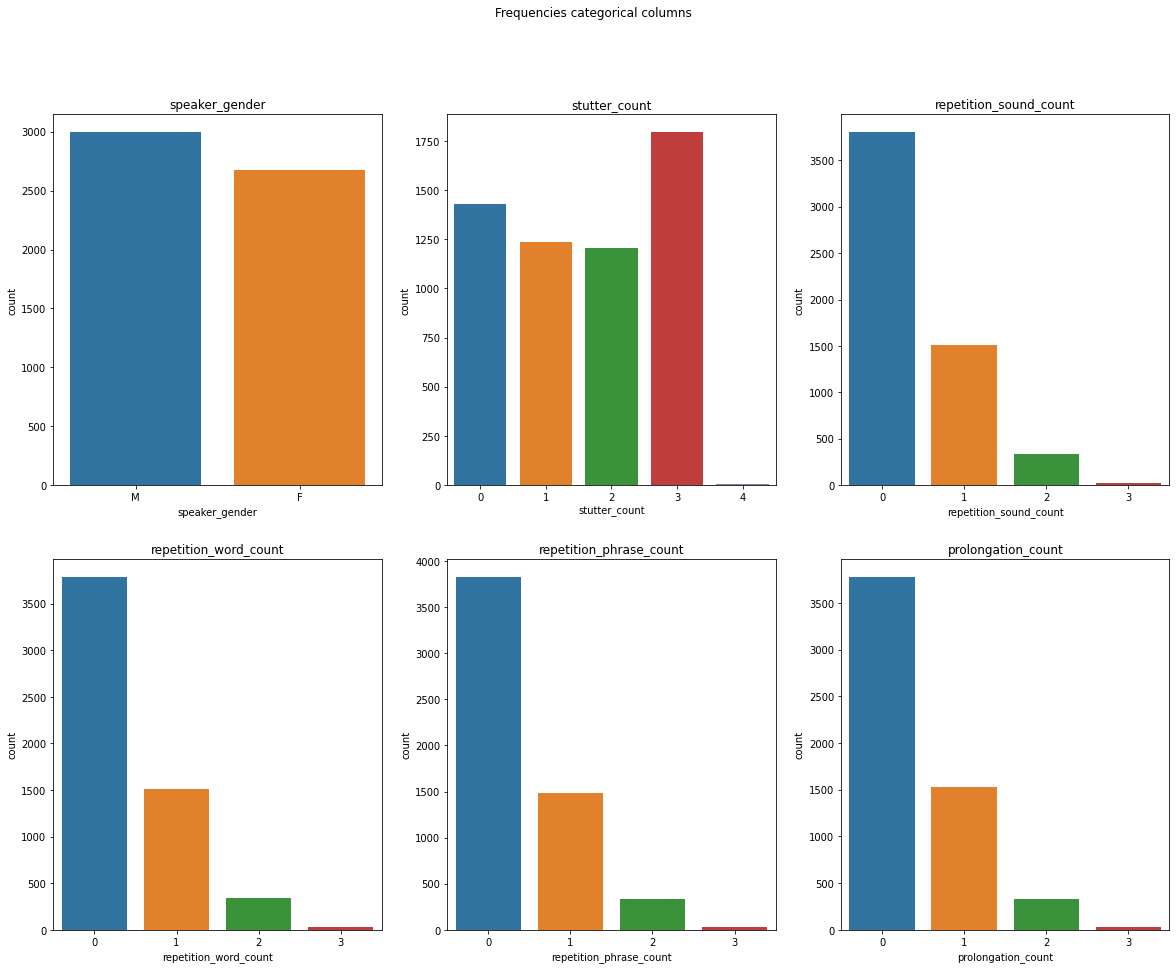

In [ ]:
categorical_columns = [
    'speaker_gender', 'stutter_count', 'repetition_sound_count', 
    'repetition_word_count', 'repetition_phrase_count', 'prolongation_count'
]

fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle("Frequencies categorical columns")

for pos, plot in enumerate(categorical_columns):
    i = pos // 3
    j = pos % 3
    sns.countplot(ax=axes[i, j], x=data[plot])
    axes[i, j].set_title(plot)

In [ ]:
[data[c].value_counts() for c in categorical_columns]

[M    2997
 F    2673
 Name: speaker_gender, dtype: int64, 3    1794
 0    1427
 1    1237
 2    1204
 4       8
 Name: stutter_count, dtype: int64, 0    3804
 1    1508
 2     336
 3      22
 Name: repetition_sound_count, dtype: int64, 0    3786
 1    1511
 2     341
 3      32
 Name: repetition_word_count, dtype: int64, 0    3826
 1    1479
 2     330
 3      35
 Name: repetition_phrase_count, dtype: int64, 0    3779
 1    1529
 2     335
 3      27
 Name: prolongation_count, dtype: int64]

In [ ]:
def printResume(data):
  # GENERAL
  print(f'Speakers: {len(data["speaker"].unique())}')
  print(f'Chapters: {len(data["chapter"].unique())}')
  print(f'Files: {data.shape[0]}')

  from datetime import timedelta
  time_stutter = timedelta(seconds=sum(data["audio_length_stutter"]))
  time_speech = timedelta(seconds=sum(data["audio_length_speech"]))
  print(f'Duration stutter: {time_stutter}')
  print(f'Duration speech: {time_speech}')

  time_stutter = timedelta(seconds=sum(data["audio_length_stutter"]) / data.shape[0])
  time_speech = timedelta(seconds=sum(data["audio_length_speech"]) / data.shape[0])
  print(f'Mean duration stutter: {time_stutter}')
  print(f'Mean duration speech: {time_speech}')
 
  # STUTTER COUNT
  print()
  print(f'Interjections: {sum(data["interjection_count"])}')
  print(f'Sound repetitions: {sum(data["repetition_sound_count"])}')
  print(f'Word repetitions: {sum(data["repetition_word_count"])}')
  print(f'Phrase repetitions: {sum(data["repetition_phrase_count"])}')
  print(f'Prolongations: {sum(data["prolongation_count"])}')

  # GENDER COUNT
  print()
  data_male = data.loc[data['speaker_gender'] == 'M']
  data_female = data.loc[data['speaker_gender'] == 'F']
  time_male = timedelta(seconds=sum(data_male["audio_length_stutter"]))
  time_female = timedelta(seconds=sum(data_female["audio_length_stutter"]))
  print(f'Files male: {data_male.shape[0]}')
  print(f'Files female: {data_female.shape[0]}')
  print(f'Duration male: {time_male}')
  print(f'Duration female: {time_female}')

  time_male = timedelta(seconds=sum(data_male["audio_length_stutter"]) / data_male.shape[0])
  time_female = timedelta(seconds=sum(data_female["audio_length_stutter"]) / data_female.shape[0])
  print(f'Mean duration male: {time_male}')
  print(f'Mean duration female: {time_female}')

In [ ]:
printResume(data)

Speakers: 50
Chapters: 116
Files: 5670
Duration stutter: 22:42:36.825215
Duration speech: 20:01:19.876735
Mean duration stutter: 0:00:14.419193
Mean duration speech: 0:00:12.712500

Interjections: 0
Sound repetitions: 2246
Word repetitions: 2289
Phrase repetitions: 2244
Prolongations: 2280

Files male: 2997
Files female: 2673
Duration male: 12:08:41.850703
Duration female: 10:33:54.974512
Mean duration male: 0:00:14.588539
Mean duration female: 0:00:14.229321


In [ ]:
data_clean = data.loc[data['stutter_count'] == 0]
data_transcription = data.loc[data['transcription_similarity'] < 0.2]
print(f'Clean files: {data_clean.shape[0]}')
print(f'Incorrect transcription: {data_transcription.shape[0]}')

Clean files: 1427
Incorrect transcription: 963


In [ ]:
printResume(data_clean)
printResume(data_transcription)

Speakers: 50
Chapters: 116
Files: 1427
Duration stutter: 4:23:37.369887
Duration speech: 4:23:37.369887
Mean duration stutter: 0:00:11.084352
Mean duration speech: 0:00:11.084352

Interjections: 0
Sound repetitions: 0
Word repetitions: 0
Phrase repetitions: 0
Prolongations: 0

Files male: 720
Files female: 707
Duration male: 2:16:58.737370
Duration female: 2:06:38.632517
Mean duration male: 0:00:11.414913
Mean duration female: 0:00:10.747712
Speakers: 40
Chapters: 71
Files: 1105
Duration stutter: 4:13:49.666304
Duration speech: 3:46:06.218685
Mean duration stutter: 0:00:13.782503
Mean duration speech: 0:00:12.277121

Interjections: 0
Sound repetitions: 334
Word repetitions: 395
Phrase repetitions: 408
Prolongations: 380

Files male: 562
Files female: 543
Duration male: 2:09:28.402993
Duration female: 2:04:21.263311
Mean duration male: 0:00:13.822781
Mean duration female: 0:00:13.740816
